[1. 2. 3. 2. 1. 4. 4. 2. 1. 3. 2. 1.]
[(1, 24), (24, 9), (9, 32), (32, 11), (11, 34), (34, 10), (10, 31), (31, 7), (7, 30), (30, 8), (8, 28), (28, 6), (6, 24), (24, 5), (5, 27), (27, 2), (2, 22), (22, 4), (4, 26), (26, 3), (3, 22), (22, 0), (0, 23), (23, 1)]


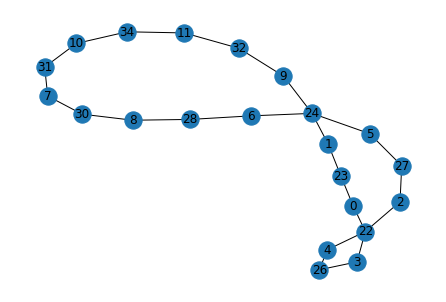

In [37]:
import numpy as np
import networkx as nx

faces = [[21, 22, 23], 
         [22, 23, 24], 
         [22, 24, 27], 
         [22, 26, 27], 
         [22, 25, 26], 
         [24, 27, 28], 
         [24, 28, 31], 
         [28, 30, 31], 
         [28, 29, 30], 
         [24, 31, 32], 
         [31, 32, 34],
         [32, 33, 34]]


spanning_tree = nx.Graph()
spanning_tree.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (2, 5), (5, 6), (6, 7), (7, 8), (6, 9), (9, 10), (10, 11)])


tree_0 = spanning_tree.copy()
tree_1 = spanning_tree.copy()

level_array = np.zeros(len(faces))


iteration_no = 1
while tree_1.number_of_nodes() >= 1:
    for node_id in list(tree_0.nodes):
        if level_array[node_id] == 0 and tree_0.degree[node_id] == 1:
            tree_1.remove_node(node_id)
            level_array[node_id] = iteration_no
    tree_0 = tree_1.copy()
    iteration_no = iteration_no + 1

print(level_array)


facet_graph = nx.Graph()
even_iterator = 2

for even_iterator in range (2, int(max(level_array))+1, 2):
    for face_id in range (len(level_array)):
        if level_array[face_id] == even_iterator:
            neighbour_faces = list(spanning_tree.adj[face_id])
            for adj_face in neighbour_faces:
                if level_array[adj_face] == even_iterator - 1:
                    common_vertices = np.intersect1d(faces[face_id], faces[adj_face])
                    facet_graph.add_edge(face_id, common_vertices[0])
                    facet_graph.add_edge(face_id, common_vertices[1])
                    facet_graph.add_edge(adj_face, common_vertices[0])
                    facet_graph.add_edge(adj_face, common_vertices[1])


for face_id in range(len(faces) - 1):
    nei_nodes = list(spanning_tree.adj[face_id])
    for adj_face_id in nei_nodes:
        if (nx.has_path(facet_graph, face_id, adj_face_id)) is False:
            common_vertices = np.intersect1d(faces[face_id], faces[adj_face_id])

            if facet_graph.has_edge(face_id, common_vertices[0]):
                facet_graph.remove_edge(face_id, common_vertices[0])
            else:
                facet_graph.add_edge(face_id, common_vertices[0])
            if facet_graph.has_edge(face_id, common_vertices[1]):
                facet_graph.remove_edge(face_id, common_vertices[1])
            else:
                facet_graph.add_edge(face_id, common_vertices[1])

            if facet_graph.has_edge(adj_face_id, common_vertices[0]):
                facet_graph.remove_edge(adj_face_id, common_vertices[0])
            else:
                facet_graph.add_edge(adj_face_id, common_vertices[0])
            if facet_graph.has_edge(adj_face_id, common_vertices[1]):
                facet_graph.remove_edge(adj_face_id, common_vertices[1])
            else:
                facet_graph.add_edge(adj_face_id, common_vertices[1])

nx.draw(facet_graph, with_labels=True)

print(list(nx.eulerian_circuit(facet_graph)))


